In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Honor\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Honor\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Honor\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
class_names = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [4]:
# define dependency 
from tensorflow.keras.models import load_model

# load model 
model = load_model('../Saved_Models/1/model.h5')

# check model info 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 250, 250, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                        

In [88]:
image1 = "../TestImages/Orange.png"
image2 = "../TestImages/Orange_citrus_greening1.png"
image3 = "../TestImages/Orange_greening.png"

1/1 [==============================] - 0s 38ms/step
[[1.3571478e-08 1.6562920e-15 1.4273440e-16 1.3191236e-12 4.6795956e-10
  4.8690174e-10 1.8630709e-16 1.6391107e-19 3.8853472e-22 1.0667611e-18
  9.6603611e-17 1.1429112e-16 1.1813917e-18 1.2535205e-15 1.4039138e-15
  1.0000000e+00 1.4682881e-13 4.2458129e-17 2.0681028e-14 2.4597468e-12
  4.7294366e-23 5.0328934e-12 1.5751530e-13 8.9566343e-22 3.8829142e-16
  1.2727349e-13 3.5926735e-22 1.7387623e-14 2.0242935e-12 1.6633704e-12
  1.0845212e-15 5.6399382e-16 1.7022713e-11 2.1222405e-14 4.2069846e-12
  2.8290920e-10 1.0859442e-17 5.1765107e-14]]


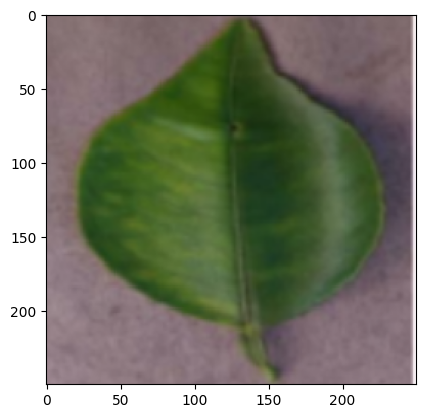

In [92]:
from keras.preprocessing import image
import numpy as np
from PIL import Image
from skimage import transform


# dimensions of our images   
img_width, img_height = 250, 250
# load the model we saved
test_image = image.load_img(image1, target_size=(img_width, img_height))
plt.imshow(test_image)

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image, batch_size=1)
print(result)

In [93]:
# test_image = Image.open('.../5c02ed550f25442260cff6ab.jpg')
# test_image = test_image.resize((750,422))
# test_image = test_image / 255.0
# test_image = test_image.reshape(224,224)

In [94]:
predictions = result
predlabel = []
prdlbl = []

for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
for i in range(len(predlabel)):
        print('Pred: '+ predlabel[i]+' actl:')

Pred: Orange___Haunglongbing_(Citrus_greening) actl:


<BarContainer object of 38 artists>

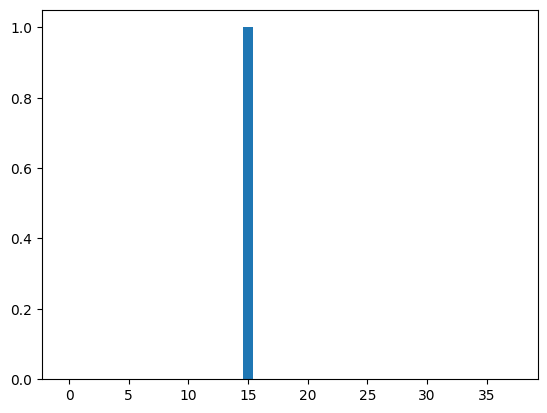

In [77]:
# for image 1
ypoints = np.array([1.3571478e-08, 1.6562920e-15, 1.4273440e-16, 1.3191236e-12, 4.6795956e-10,
  4.8690174e-10, 1.8630709e-16, 1.6391107e-19, 3.8853472e-22, 1.0667611e-18,
  9.6603611e-17, 1.1429112e-16, 1.1813917e-18, 1.2535205e-15, 1.4039138e-15,
  1.0000000e+00, 1.4682881e-13, 4.2458129e-17, 2.0681028e-14, 2.4597468e-12,
  4.7294366e-23, 5.0328934e-12, 1.5751530e-13, 8.9566343e-22, 3.8829142e-16,
  1.2727349e-13, 3.5926735e-22, 1.7387623e-14, 2.0242935e-12, 1.6633704e-12,
  1.0845212e-15, 5.6399382e-16, 1.7022713e-11, 2.1222405e-14, 4.2069846e-12,
  2.8290920e-10, 1.0859442e-17, 5.1765107e-14])
xpoints = np.array([i for i in range(len(ypoints))])

plt.bar(xpoints, ypoints)

In [29]:
predlabel

['Orange___Haunglongbing_(Citrus_greening)']

In [25]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)
    break

NameError: name 'validation_ds' is not defined

<Figure size 3000x3000 with 0 Axes>

<hr>

# Save the model with pd format

In [7]:
model_version = 2
model.save(f"../Saved_Models/{model_version}")

INFO:tensorflow:Assets written to: ../Saved_Models/2\assets


INFO:tensorflow:Assets written to: ../Saved_Models/2\assets


In [6]:
from tensorflow import keras

model_version = 2
keras.experimental.export_saved_model(model, f'../Saved_Models/{model_version}')

AttributeError: module 'tensorflow.keras.experimental' has no attribute 'export_saved_model'